## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

### The Normal Equation

$\hat{\theta} = (X^{T}X)X^{T}y$

Text(0, 0.5, '$y$')

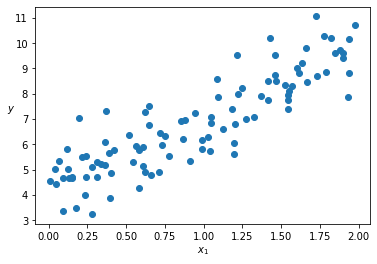

In [2]:
# Generate some linear-looking data to test this equation
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.scatter(X, y)
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)

In [3]:
# Computting the Normal Equation
X_b = np.c_[np.ones((100,1)), X] # This adds x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # Normal Equation
# X_b.T, transposed X_b and dot product from itself.
print(theta_best)

[[4.21509616]
 [2.77011339]]


From the original function the right parameters would be 4 and 3.

$y = 4 + 3*X + noise$

In [4]:
# Making predictions using theta_hat
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

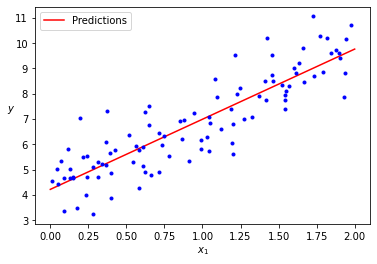

In [5]:
# Plotting model's predictions
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='upper left')

In [6]:
# Comparison with Scikit linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [7]:
# Prediction
y_pred_lin_reg = lin_reg.predict(X_new)
print(y_pred_lin_reg)

[[4.21509616]
 [9.75532293]]


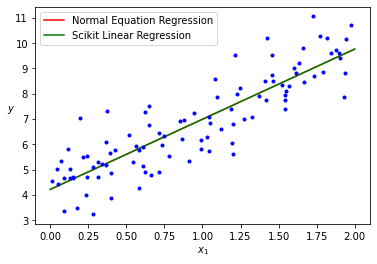

In [8]:
# Plotting all model's predictions
plt.plot(X_new, y_predict, 'r-', label='Normal Equation Regression')
plt.plot(X_new, y_pred_lin_reg, 'g-', label='Scikit Linear Regression')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='upper left')

Scikit uses the pseudo-inverse matrix: $X^{+}$ to compute the $\hat{\theta}$. Which is always defined.

### Gradient Descent
Tweaking parameters in order to iteratively minimize a cost function.

#### Batch Gradient Descent

Compute change in the _Cost Function_ by changes in the $\theta_{j}$ parameter ( _Partial Derivative_ ).

Partial Derivatives of the Cost Function:
$$\frac{\partial}{\partial\theta_{j}}MSE(\theta) = \frac{2}{m}\sum_{i=1}^m(\theta^{T}x^{(i)}-y^{i})x_{j}^{(i)}$$

Gradient Vector of the Cost Function:
$$\nabla_{\theta}MSE(\theta) = \frac{2}{m}X^{T}(X\theta - y)$$

Gradient Descent Step:
$$\theta^{(next step)} = \theta - \eta\nabla_{\theta}MSE(\theta)$$

In [9]:
# Quick Implementation
eta = 0.1         # Learning Rate
n_iterations = 1000
m = 100              # Features

theta = np.random.randn(2,1) # Random Initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # Gradient Vector of the Cost Function
    theta = theta - (eta * gradients )                # Gradient Descent Step
    
theta

array([[4.21509616],
       [2.77011339]])

In [10]:
y_pred_gd = X_new_b.dot(theta)

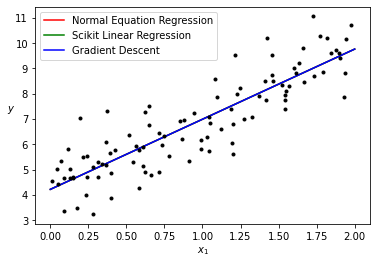

In [11]:
plt.plot(X_new, y_predict, 'r-', label='Normal Equation Regression')
plt.plot(X_new, y_pred_lin_reg, 'g-', label='Scikit Linear Regression')
plt.plot(X_new, y_pred_gd, 'b-', label='Gradient Descent')
plt.plot(X, y, 'k.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='upper left')

In [39]:
theta_path_bgd = []

theta = np.random.randn(2,1)

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'g-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # Gradient Vector of the Cost Function
        theta = theta - (eta * gradients )                # Gradient Descent Step
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('$x_1$')
    plt.axis([0,2,0,15])
    plt.title(f'$\eta = {eta}$')

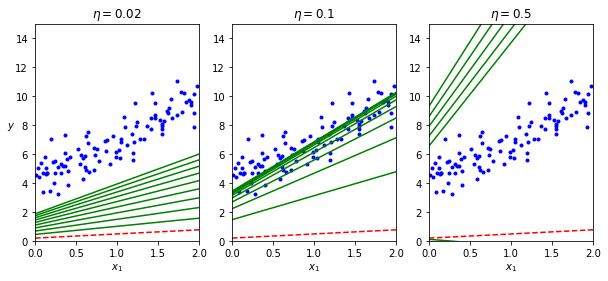

In [40]:
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

### Stochastic Gradient Descent

In [14]:
# Randomly selects an instance and compute its gradients at every step.
# Implementing simple Stochastic Gradient Descent using a simple learning schedule
n_epochs = 50
t0, t1 = 5, 50 # Learning schedule hyperparameters
m = 100 # features

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

In [15]:
y_pred_stochastic = X_new_b.dot(theta)

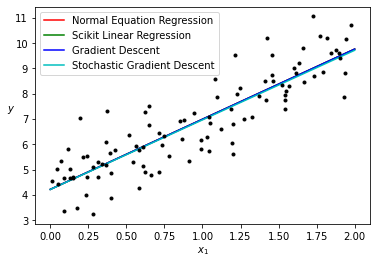

In [16]:
plt.plot(X_new, y_predict, 'r-', label='Normal Equation Regression')
plt.plot(X_new, y_pred_lin_reg, 'g-', label='Scikit Linear Regression')
plt.plot(X_new, y_pred_gd, 'b-', label='Gradient Descent')
plt.plot(X_new, y_pred_stochastic, 'c-', label='Stochastic Gradient Descent')
plt.plot(X, y, 'k.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='upper left')

In [30]:
theta_path_sgd = []

def plot_stochastic_gradient_descent(theta, n_epochs, t0, t1):
    m = len(X_b)
    plt.plot(X, y, '.b')
    for epoch in range(n_epochs):
        for i in range(m):
            if epoch == 0 and i < 20:
                y_pred_stochastic = X_new_b.dot(theta)
                style = 'g-' if i > 0 else 'r--'
                plt.plot(X_new, y_pred_stochastic, style)
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients
            theta_path_sgd.append(theta)
    plt.xlabel('$x_1$')
    plt.axis([0,2,0,15])

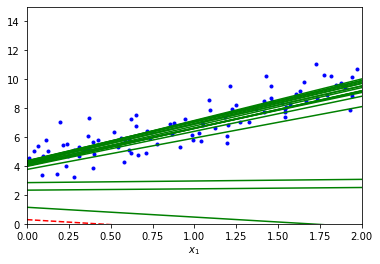

In [31]:
theta = np.random.randn(2,1)
plot_stochastic_gradient_descent(theta, 50, 5, 50)

In [28]:
# Performing Linear Regression with Stochastic Gradient Descent, SGDRegressor class
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None, random_state=42, tol=-inf)

In [29]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.16782089]), array([2.72603052]))

### Mini-batch Gradient Descent

Mini batch is something like a mix and match from the previous algorithms. It computes the gradients on small random sets of instances called mini-batches.

In [34]:
theta_path_mgd = []

n_iterations= 50
minibatch_size = 20

np.random.seed(42)
t0, t1 = 200, 1000
theta = np.random.randn(2,1)  # random initialization

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = (2 / minibatch_size) * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [35]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [42]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

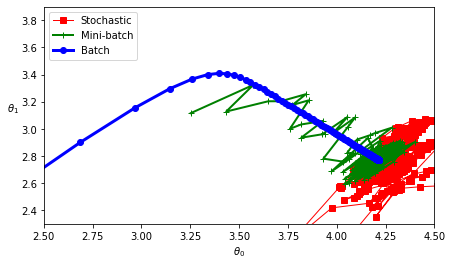

In [44]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

### Polynomial Regression

Text(0, 0.5, '$y$')

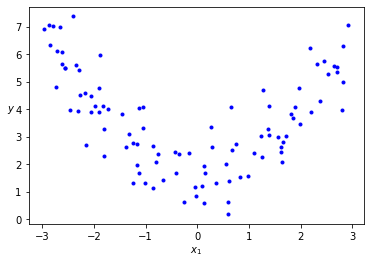

In [48]:
# Polynomial Regression can be achieved with Linear Regression models adding powers to each feature as new features
# i.e. x_i * x_i, as a new feature xi, x_i * x_i, etc.
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + 2 + np.random.randn(m, 1)

plt.plot(X, y, '.b')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)

In [56]:
# Transforming training data: adding 2nd degree polynomial - square of each feature in the training set as new
# features.
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[-0.06633107,  0.56456263]]))

In [58]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_poly_pred = lin_reg.predict(X_new_poly)

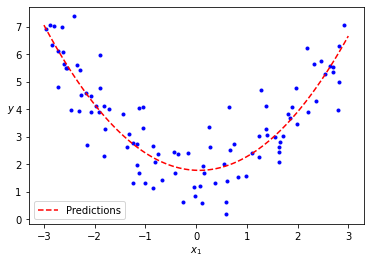

In [62]:
plt.plot(X, y, '.b')
plt.plot(X_new, y_poly_pred, 'r--', label='Predictions')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='lower left')

The model equation is:
$\hat{y} = 0.56x_1^2 + -0.06x_1 + 1.78$

While the original equation is: 
$y = 0.5x_1^2 + x_1 + 2 + Gaussian Noise$

### Learning Curves

In [ ]:
# "How can you tell that your model is overfitting or underitting the data?"

